<a href="https://colab.research.google.com/github/pknemi/Data-visualization-Tasks/blob/main/heart_health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_health_data.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
df.shape

(319795, 18)

In [8]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

1.**HEART DISEASE PERCENTAGE BREAKDOWN**

In [3]:
HD=df["HeartDisease"].value_counts()
HD

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

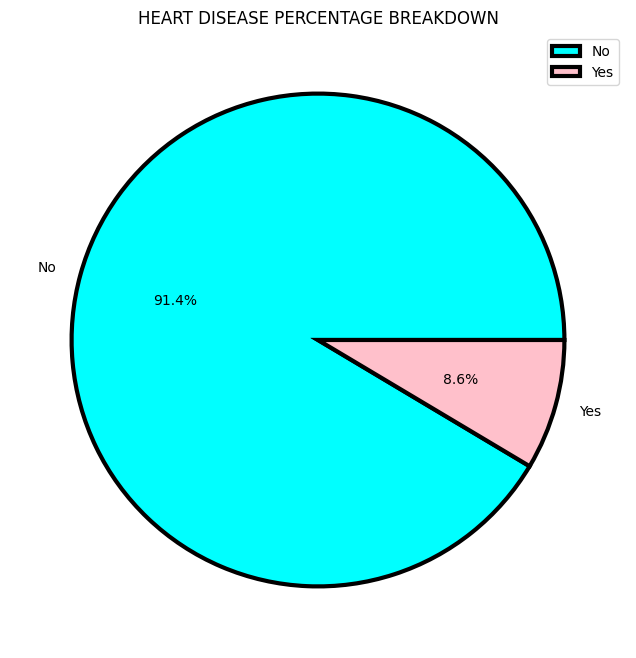

In [4]:
plt.figure(figsize=(8,8))
wedgeprops={"edgecolor":"black","linewidth":3}
color=["aqua","pink"]
plt.pie(HD,labels=HD.index,wedgeprops=wedgeprops,autopct="%1.1f%%",colors=color)
plt.title("HEART DISEASE PERCENTAGE BREAKDOWN")
plt.legend(bbox_to_anchor=(1,1))

INSIGHT-The pie chart indicates that a significant majority,91% of the population does not have heart disease.

****

**2.Analysis of Smoking Habits of Heart Patients by Gender**

In [7]:
HD=df[df["HeartDisease"]=="Yes"]
gender=HD["Sex"].value_counts()
gender


Sex
Male      16139
Female    11234
Name: count, dtype: int64

<Axes: title={'center': 'Smoking Habits of Heart Patients by Gender'}, xlabel='Sex', ylabel='count'>

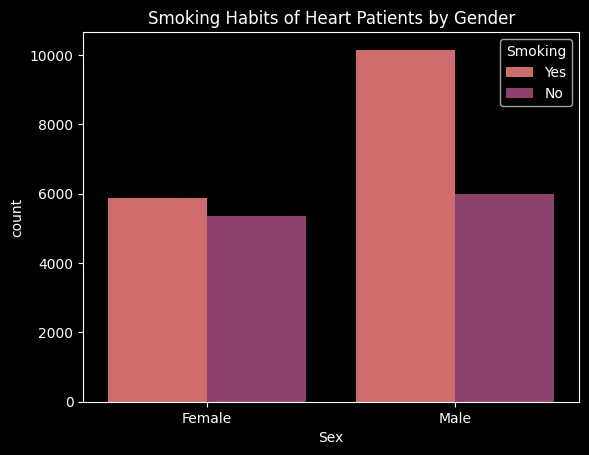

In [8]:
plt.title("Smoking Habits of Heart Patients by Gender")
sns.countplot(x="Sex",data=HD,hue="Smoking",palette="flare")

  According to the Data,the number of Male Heart patients who smoke is above 10,000 compared to 6000 females.

**3.DISTRIBUTION OF HEARTDISEASE BY GENDER**

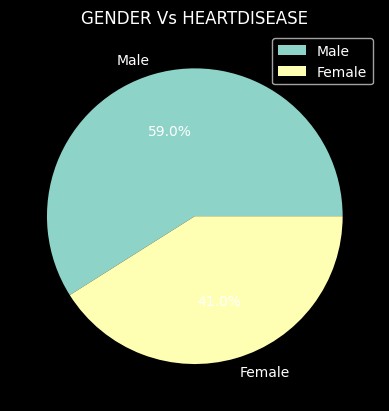

In [9]:
plt.style.use("dark_background")
plt.title("GENDER Vs HEARTDISEASE")
plt.pie(gender,labels=gender.index,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1))

INSIGHT-According to the Data,58% of people with heart disease are Male

**4.COMPARISON OF ALCOHOLISM AND SMOKING HABITS AMONG MALE AND FEMALE HEART PATIENTS.**

In [10]:
HDA=df[(df["HeartDisease"]=="Yes") & (df["AlcoholDrinking"]=="Yes")]
#HDA-Alcholic with Heart Disease


<Axes: title={'center': 'GENDER DIFFERENCES IN SMOKING AMONG ALCOHOLIC HEART PATIENTS'}, xlabel='Sex', ylabel='count'>

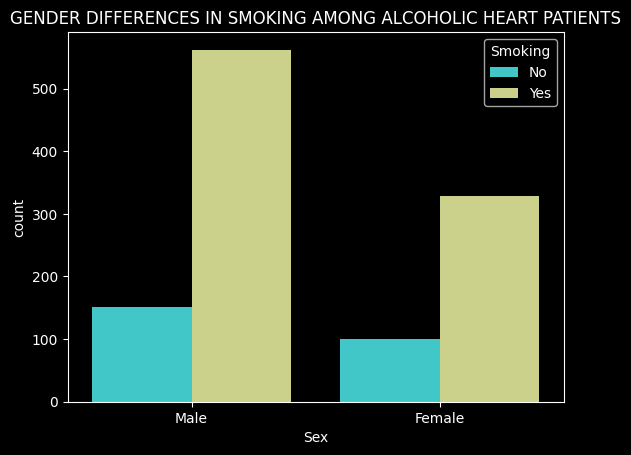

In [11]:
plt.title("GENDER DIFFERENCES IN SMOKING AMONG ALCOHOLIC HEART PATIENTS")
sns.countplot(x="Sex",data=HDA,hue="Smoking",palette="rainbow")


INSIGHT-The number of Male Heart patients who are Alcholics and smokers exceeds 550,whereas the corresponding figure for females is  around 325

**5.ANALYSIS OF NUMBER OF PEOPLE WHO ARE LIKELY TO BE CARDIAC PATIENTS IN FUTURE, WITH 5 HIGH RISK FACTORS**

In [12]:
#HR-High Risk Categrory
HR=df[(df["Smoking"]=="Yes") & (df["HeartDisease"]=="No") & (df["AlcoholDrinking"]=="Yes") & (df["Diabetic"]=="Yes") & (df["PhysicalActivity"]=="No") & (df["BMI"]>30)]

In [13]:
counts_hr=HR["Sex"].value_counts()
counts_hr


Sex
Male      77
Female    39
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7d241e292b90>,
 [Text(-0.5413777450643507, 0.9575542476272763, 'Male'),
  Text(0.5413776554116493, -0.9575542983147148, 'Female')],
 [Text(-0.29529695185328214, 0.5223023168876052, '66.4%'),
  Text(0.29529690295180866, -0.5223023445352989, '33.6%')])

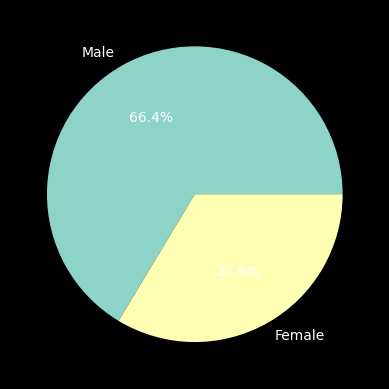

In [14]:
plt.pie(counts_hr,labels=counts_hr.index,autopct="%1.1f%%")

INSIGHT-Out of 118 individuals with high-risk factors such as diabetes,smoking,alcholism,obesity,and lack of physical Activity, 77 are Males,representing 66% likelihood of being heart patients.

**6.HIGH RISK HEART DISEASE PATIENTS**




In [15]:
#HRHD- HeartDisease Patients with high risk factors
HRHD=df[(df["Smoking"]=="Yes") & (df["HeartDisease"]=="Yes") & (df["AlcoholDrinking"]=="Yes") & (df["Diabetic"]=="Yes") & (df["PhysicalActivity"]=="No") & (df["BMI"]>30)]
high_risk=HRHD["Sex"].value_counts()
high_risk

Sex
Male      34
Female     6
Name: count, dtype: int64

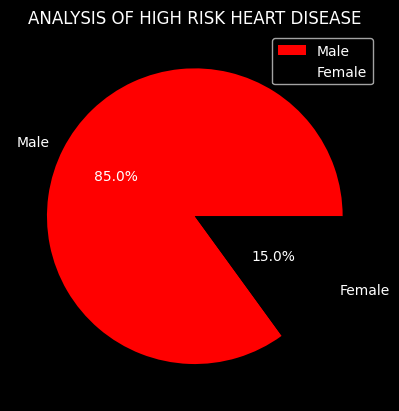

In [17]:
plt.title("ANALYSIS OF HIGH RISK HEART DISEASE")
color=["red","black"]
plt.pie(high_risk,labels=high_risk.index,colors=color,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1))

INSIGHT-The analysis reveals that 85% of heart patients with high-risk heart disease are male, compared to females.

**7.ANALYSIS OF PEOPLE WITH ALL 5 HIGH RISK FACTORS,AND ALSO ASTHEMIC**

<Axes: title={'center': 'Comparison of High-Risk Factors and Asthma Prevalence between Male and Female Populations'}, xlabel='Sex', ylabel='count'>

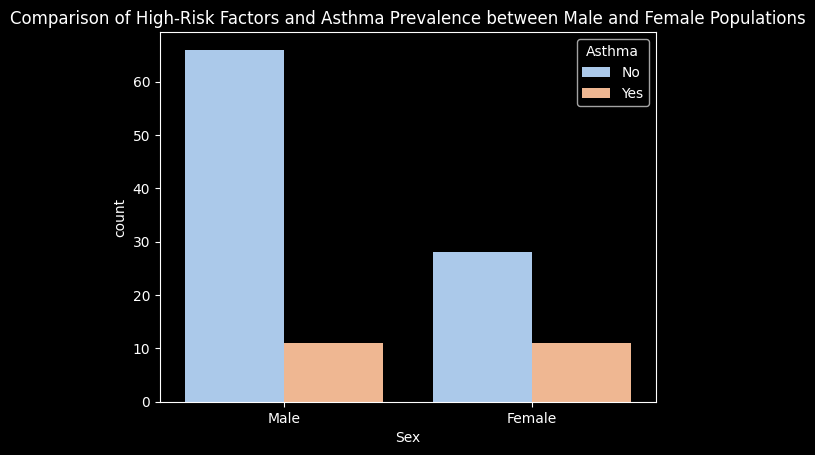

In [18]:
plt.title("Comparison of High-Risk Factors and Asthma Prevalence between Male and Female Populations")
sns.countplot(x="Sex",data=HR,hue="Asthma",palette="pastel")

INSIGHT-The analysis reveals that the number of males with high-risk factors and asthma exceeds 65, while the corresponding number for females is 25.

**8.DISTRIBUTION PLOT OF PHYSICAL HEALTH AMONG HIGH RISK HEART PATIENTS**

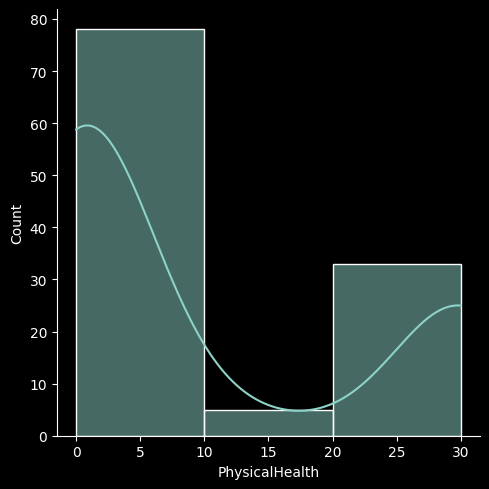

In [21]:

sns.displot(HR['PhysicalHealth'],kde=True,bins=3)


INSIGHT-The majority of heart patients fall within the 0-10 range on the physical health scale.

**9.DISTRIBUTION PLOT OF MENTAL HEALTH AMONG HIGH RISK HEART PATIENTS**

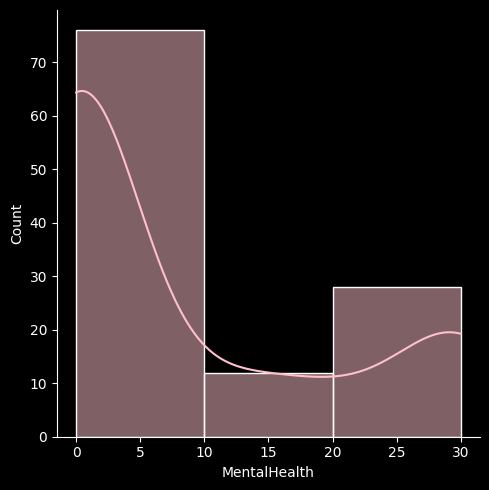

In [22]:
sns.displot(HR['MentalHealth'],kde=True,bins=3,color="pink")

INSIGHT-The majority of heart patients fall within the 0-10 range on the mental health scale

**10.Comparison of General Health Condition between Males and Females with No Risk Factors**

In [23]:
#HF-Healthy and fit
HF=df[(df["Smoking"]=="No") & (df["HeartDisease"]=="No") & (df["AlcoholDrinking"]=="No") & (df["SkinCancer"]=="No") & (df["Stroke"]=="No") & (df["Diabetic"]=="No") & (df["PhysicalActivity"]=="Yes") & (df["BMI"]<24) & (df["KidneyDisease"]=="No")]
HF["GenHealth"].value_counts()

GenHealth
Excellent    13567
Very good    12697
Good          5174
Fair           891
Poor           167
Name: count, dtype: int64

<Axes: title={'center': 'Health of Risk-Free Individuals by Gender'}, xlabel='Sex', ylabel='count'>

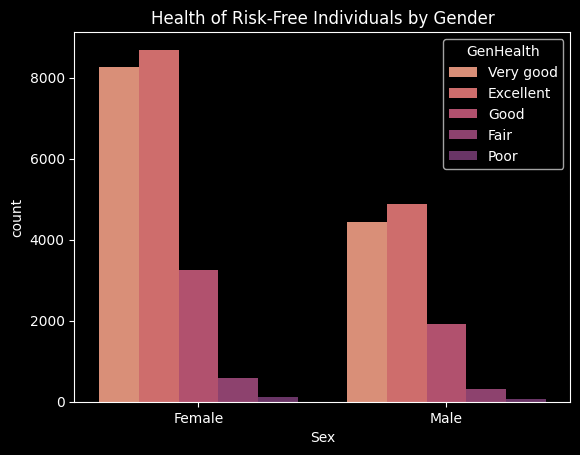

In [24]:
plt.title("Health of Risk-Free Individuals by Gender")
sns.countplot(x="Sex",data=HF,hue="GenHealth",palette="flare")

INSIGHT-Among individuals without risk factors, over 8,000 females and more than 4,000 males are in excellent health, while those in poor health are below 100.








**11.DISTRIBUTION OF HEART DISEASE IN AGE CATEGORY 25-29::**

In [25]:
AgeCategory=df.groupby("AgeCategory")
Low_Age_group=AgeCategory.get_group("25-29")
LAHD=Low_Age_group["HeartDisease"].value_counts()
LAHD#low age group with heart disease

HeartDisease
No     16822
Yes      133
Name: count, dtype: int64

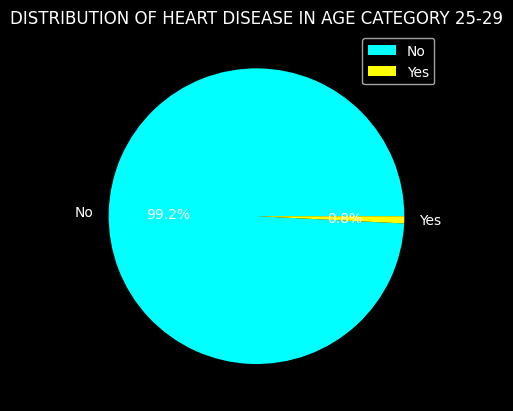

In [28]:
plt.title("DISTRIBUTION OF HEART DISEASE IN AGE CATEGORY 25-29")
color=["cyan","yellow"]
plt.pie(LAHD,labels=LAHD.index,colors=color,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1))

INSIGHT-Among individuals in the age category of 25-29, 99% do not have cardiac conditions.

**12.AGE DISTRIBUTION OF HEART PATIENTS**

In [29]:
hd=df[df["HeartDisease"]=="Yes"]
hdc=hd['AgeCategory'].value_counts()
hdc

AgeCategory
80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: count, dtype: int64

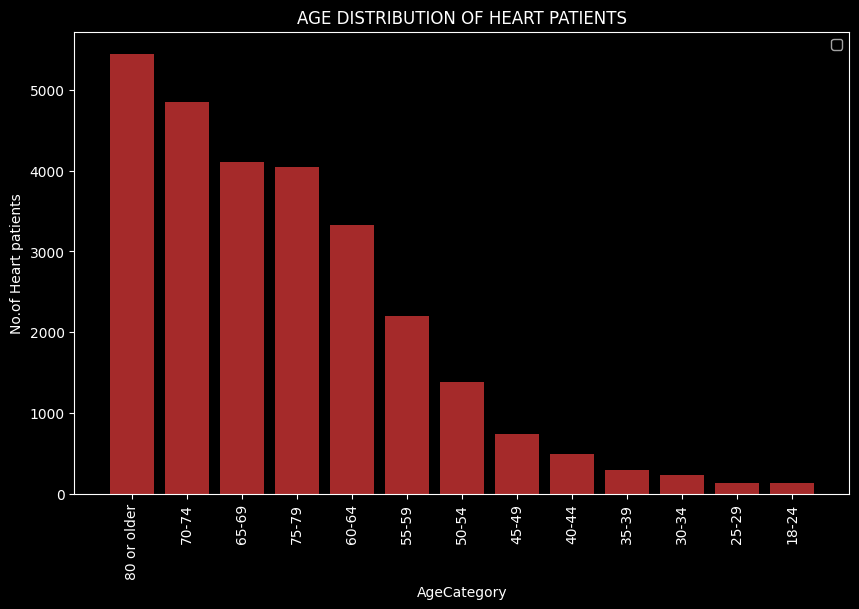

In [30]:
plt.style.use("dark_background")
plt.figure(figsize=(10,6))
plt.title("AGE DISTRIBUTION OF HEART PATIENTS")
plt.bar(hdc.index,hdc.values,color="brown")
plt.xlabel("AgeCategory")
plt.ylabel("No.of Heart patients")
plt.xticks(rotation=90)
plt.legend()

INSIGHT-The majority of heart patients fall into the age group of 80 or older, with specifically over 5000 cases, as illustrated graphically.








**13.HEART PATIENTS WITH KIDNEY DISEASE**

In [31]:
filt = df['HeartDisease']=='Yes'
KDHD=df.loc[filt]['KidneyDisease'].value_counts()
KDHD#kidney disease with heartdisease

KidneyDisease
No     23918
Yes     3455
Name: count, dtype: int64

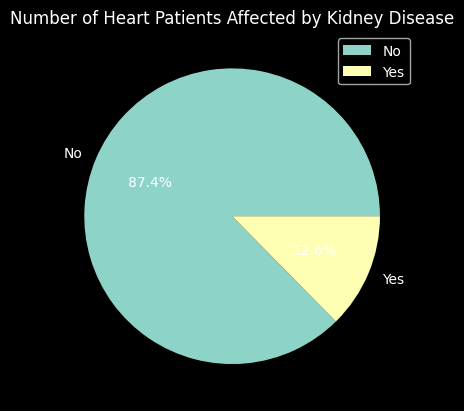

In [32]:
plt.title("Number of Heart Patients Affected by Kidney Disease")
plt.pie(KDHD,labels=KDHD.index,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1))

INSIGHT- The pie chart reveal that 12% of individuals are affected by both kidney disease and heart disease.

**14.SLEEPTIME DISTRIBUTION CURVE AMONG HIGH RISK HEART PATIENTS**

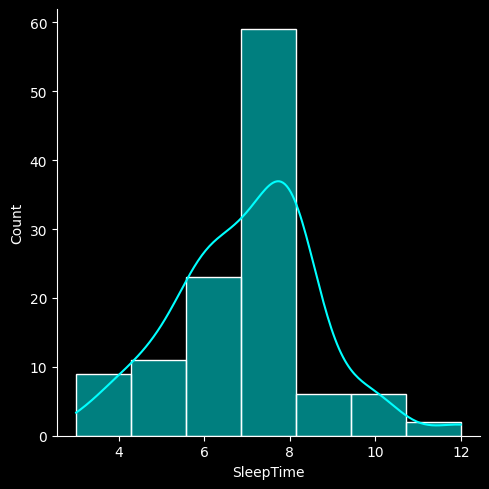

In [65]:
sns.displot(HR['SleepTime'],kde=True,bins=7,color="cyan")

**15.Alcoholic Habits of Heart Patients by Gender**

<Axes: title={'center': 'Alcoholic Habits of Heart Patients by Gender'}, xlabel='Sex', ylabel='count'>

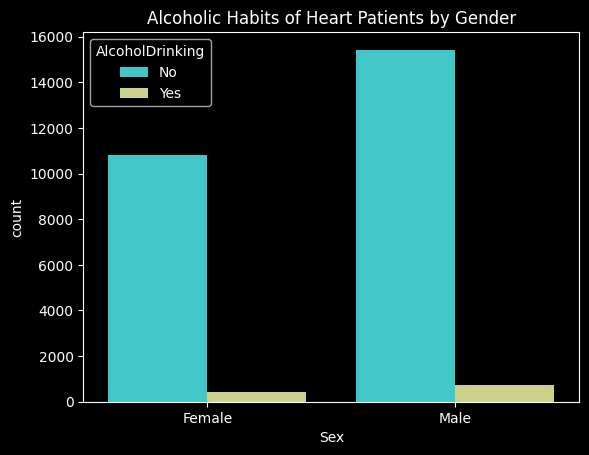

In [71]:
plt.title("Alcoholic Habits of Heart Patients by Gender")
sns.countplot(x="Sex",data=HD,hue="AlcoholDrinking",palette="rainbow")

**16.Heart patients with skin cancer by gender**

In [19]:
skin_cancer=HD.groupby("SkinCancer")
skin_cancer_counts=skin_cancer.get_group("Yes")
scc=skin_cancer_counts["Sex"].value_counts()
scc

Sex
Male      3302
Female    1678
Name: count, dtype: int64

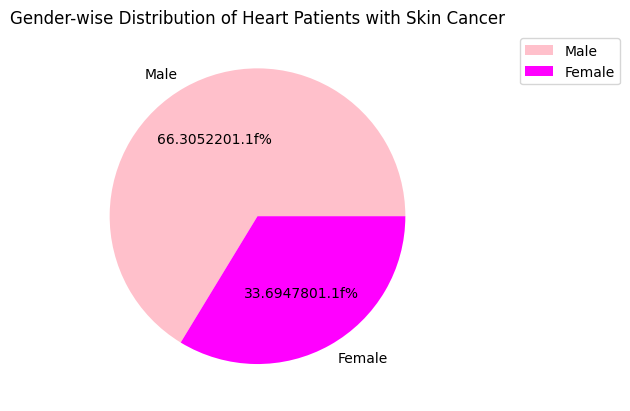

In [23]:
plt.title("Gender-wise Distribution of Heart Patients with Skin Cancer")
color=["pink","magenta"]
plt.pie(scc,labels=scc.index,colors=color,autopct="%f1.1f%%")
plt.legend(bbox_to_anchor=(1.5,1))

INSIGHT-The pie chart indicates that a significant majority, constituting 66%, of heart patients with skin cancer are male.

**17.FINDING CORRELATION BETWEEN BMI,MENTALHEALTH,PHYSICALHEALTH AND SLEEPTIME IN HEARTPATIENTS**

In [34]:
numeric_columns=HD.select_dtypes(include="number")
numeric_columns

,BMI,PhysicalHealth,MentalHealth,SleepTime
5,28.87,6.0,0.0,12.0
10,34.30,30.0,0.0,15.0
35,32.98,10.0,0.0,4.0
42,25.06,0.0,0.0,7.0
43,30.23,6.0,2.0,8.0
...,...,...,...,...
319765,38.45,30.0,15.0,6.0
319767,36.21,0.0,0.0,8.0
319781,37.12,0.0,0.0,7.0
319786,33.20,0.0,0.0,8.0


In [35]:
numeric_columns.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.106668,0.074597,-0.040080
PhysicalHealth,0.106668,1.000000,0.349016,-0.083267
MentalHealth,0.074597,0.349016,1.000000,-0.126005
SleepTime,-0.040080,-0.083267,-0.126005,1.000000


<Axes: title={'center': 'CORRELATION BETWEEN BMI,MENTALHEALTH,PHYSICALHEALTH AND SLEEPTIME IN HEARTPATIENTS'}>

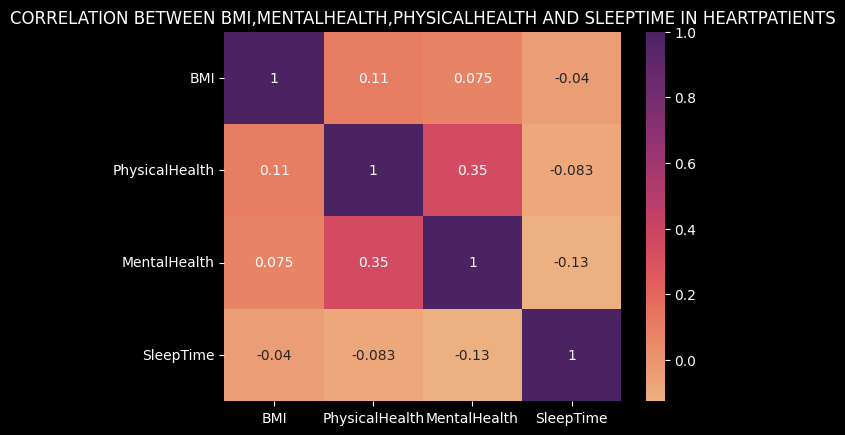

In [37]:
plt.title("CORRELATION BETWEEN BMI,MENTALHEALTH,PHYSICALHEALTH AND SLEEPTIME IN HEARTPATIENTS")
sns.heatmap(numeric_columns.corr(),annot=True,cmap="flare")

**18.DISTRIBUTION OF DIABETIC HEART PATIENTS WITH HIGH BMI**

In [61]:
#HDBMI-DIABETIC HEART PATIENTS WITH HIGH BMI
HDBMI=df[(df["HeartDisease"]=="Yes") & (df["Diabetic"]=="Yes") & (df["BMI"]>=50)]
HDBMI["BMI"].value_counts()


BMI
51.21    5
54.87    4
55.79    4
50.12    3
53.14    3
        ..
53.21    1
60.76    1
65.84    1
60.99    1
52.46    1
Name: count, Length: 128, dtype: int64

<Axes: xlabel='BMI', ylabel='PhysicalHealth'>

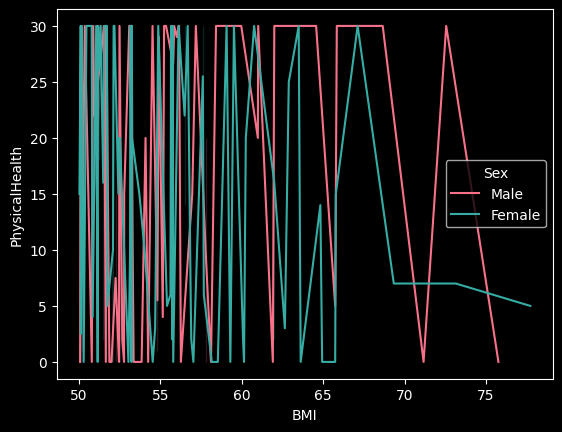

In [63]:
sns.lineplot(x="BMI",y="PhysicalHealth",data=HDBMI,hue="Sex",palette="husl")

# **19.DISTRIBUTION OF BMI OF HIGH RISK HEART PATIENTS**

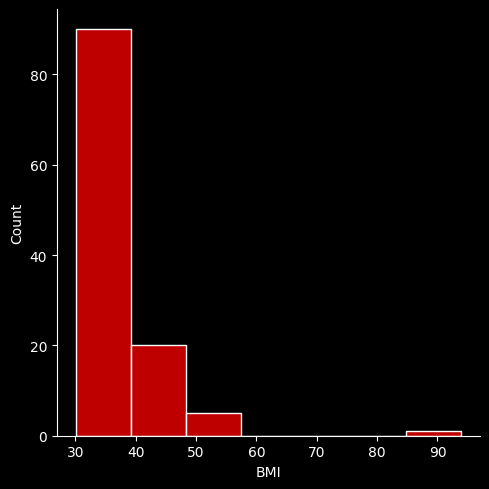

In [56]:
sns.displot(HR['BMI'],bins=7,color="red")

INSIGHT-The majority of heart patients fall within the 30-40 range on the BMI scale.

**20.DISTRIBUTION OF DIABETIC HEART PATIENTS WHO HAD STROKE BY GENDER**

In [71]:
#HDS-DIABETIC heart disease patient who had stroke
HDS=df[(df["HeartDisease"]=="Yes") & (df["Stroke"]=="Yes")]
HDS["Sex"].value_counts()

Sex
Male      2378
Female    2011
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

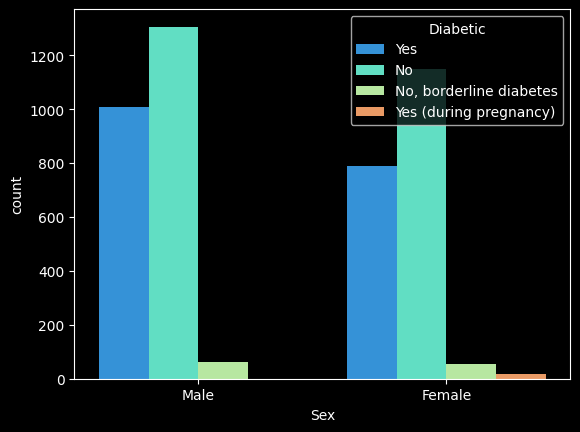

In [79]:
sns.countplot(x="Sex",data=HDS,hue="Diabetic",palette="rainbow")

INSIGHT-There are about 1300 male heart patients without diabetes who have experienced a stroke, while the number of diabetic male heart patients who have had a stroke exceeds 1200. Similarly, in females, the count stands at 1100 for heart patients without diabetes and around 750 for diabetic heart patients who have had a stroke.






